# Problem Statement

This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

Task 1:  Analysis we aim at comparing key clustering algorithms with the aim of finding an optimal option that can be adopted in tourism domain .

Task 2 : Recommendation of most higjly rated place.

## Data Description
Attribute 1 : Unique user id

Attribute 2 : Average user feedback on art galleries

Attribute 3 : Average user feedback on dance clubs

Attribute 4 : Average user feedback on juice bars

Attribute 5 : Average user feedback on restaurants

Attribute 6 : Average user feedback on museums

Attribute 7 : Average user feedback on resorts

Attribute 8 : Average user feedback on parks/picnic spots

Attribute 9 : Average user feedback on beaches

Attribute 10 : Average user feedback on theaters

Attribute 11 : Average user feedback on religious institutions

### Task 1: Analysis we aim at comparing key clustering algorithms with the aim of finding an optimal option that can be adopted in tourism domain .

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tour=pd.read_csv('tripadvisor_review.csv')

In [3]:
tour.head(2)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32


### 1.Data Preparation

In [4]:
tour.columns

Index(['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10'],
      dtype='object')

We can rename the columns as given attribute as category 1= art galleries

In [5]:
df_trip=tour.rename(columns={"Category 1": "art galleries","Category 2": "dance clubs","Category 3": "juice bars","Category 4": "restaurants","Category 5": "museums","Category 6": "resorts","Category 7": "parks/picnic spots","Category 8": " beaches","Category 9": "theaters","Category 10": "religious institutions"})

In [6]:
df_trip.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [7]:
df_trip.shape

(980, 11)

In [8]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
User ID                   980 non-null object
art galleries             980 non-null float64
dance clubs               980 non-null float64
juice bars                980 non-null float64
restaurants               980 non-null float64
museums                   980 non-null float64
resorts                   980 non-null float64
parks/picnic spots        980 non-null float64
 beaches                  980 non-null float64
theaters                  980 non-null float64
religious institutions    980 non-null float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [9]:
df_trip.describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


### 1.1 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [10]:
df_trip.isnull().sum()

User ID                   0
art galleries             0
dance clubs               0
juice bars                0
restaurants               0
museums                   0
resorts                   0
parks/picnic spots        0
 beaches                  0
theaters                  0
religious institutions    0
dtype: int64

As we can see there are no missing value in the the given dataset

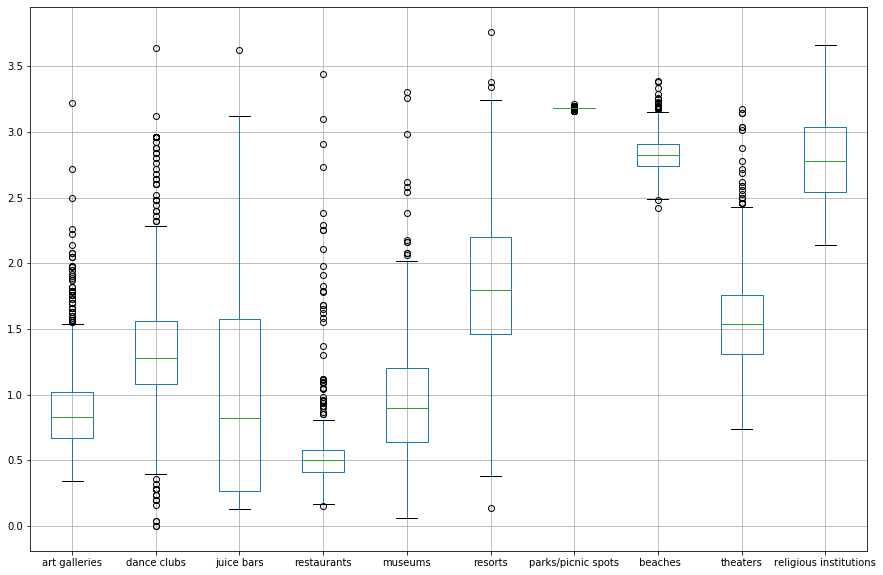

In [11]:
df_trip.boxplot(figsize=(15,10))

Outliers are present 

In [12]:
from scipy import stats

z = np.abs(stats.zscore(df_trip[['art galleries', 'dance clubs', 'juice bars', 'restaurants','museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters','religious institutions']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[0.11264465 0.93588703 1.6197497  ... 0.32787224 0.68751758 1.18059095]
 [0.38808847 1.77264397 2.08917107 ... 1.49205628 0.797274   1.49190812]
 [1.00018585 1.15600533 0.60048651 ... 0.25511074 0.71187679 0.93153721]
 ...
 [0.86671115 0.06822131 0.43555468 ... 0.18234924 0.62955947 0.68731207]
 [0.11264465 2.41114075 1.12065614 ... 1.05459631 1.23321978 1.05606408]
 [0.11264465 1.6580595  0.14805027 ... 0.25421978 0.62955947 1.24285439]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([  1,  11,  25,  48,  52,  61,  75,  80,  82,  84,  88,  99, 123,
       145, 157, 171, 180, 199, 226, 228, 234, 239, 239, 242, 247, 257,
       258, 274, 286, 287, 293, 307, 322, 330, 358, 372, 377, 408, 422,
       422, 425, 437, 446, 467, 470, 479, 483, 487, 501, 505, 507, 508,
       536, 545, 592, 599, 601, 608, 612, 613, 629, 631, 641, 666, 666,
       677, 694, 70

In [13]:
# Removing the outliers

data_outliers_removed = df_trip[(z<3).all(axis=1)]

In [14]:
df_trip.shape

(980, 11)

In [15]:
data_outliers_removed.shape

(900, 11)

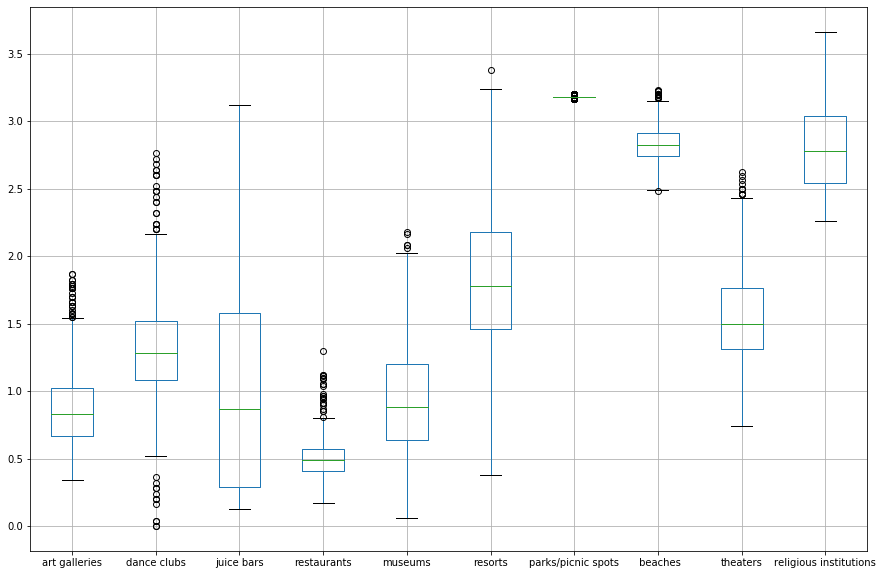

In [16]:
data_outliers_removed.boxplot(figsize=(15,10))

In [17]:
data_outliers_removed.reset_index(drop=True)

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
2,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
3,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
4,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
...,...,...,...,...,...,...,...,...,...,...,...
895,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
896,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
897,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
898,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [18]:
data_outliers_removed.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66


### 2 Data Preprocessing

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [19]:
df_trip_outliers_removed = data_outliers_removed.set_index('User ID')

In [20]:
from sklearn.preprocessing import StandardScaler
std_tour = StandardScaler().fit_transform(df_trip_outliers_removed)

X_scaled = pd.DataFrame(std_tour, columns = df_trip_outliers_removed.columns)

X_scaled.head()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,0.202779,1.195742,1.606027,0.866767,-0.305195,1.114414,1.164213,-0.334675,0.797025,-1.200847
1,1.234462,-1.275026,-0.620032,0.223718,-1.706093,-0.552755,-0.116706,-0.258265,-0.720393,-0.950294
2,-1.504834,1.195742,-0.938040,0.509517,-1.155740,-0.590645,-0.116706,0.964292,0.053192,0.177197
3,-1.291383,-0.286719,0.194070,0.509517,1.545990,0.356610,-0.116706,-0.411085,-1.107186,-0.825017
4,0.416231,-0.089057,-0.391066,-1.633981,-0.455292,-1.083218,-1.397624,0.429423,0.320972,2.682732


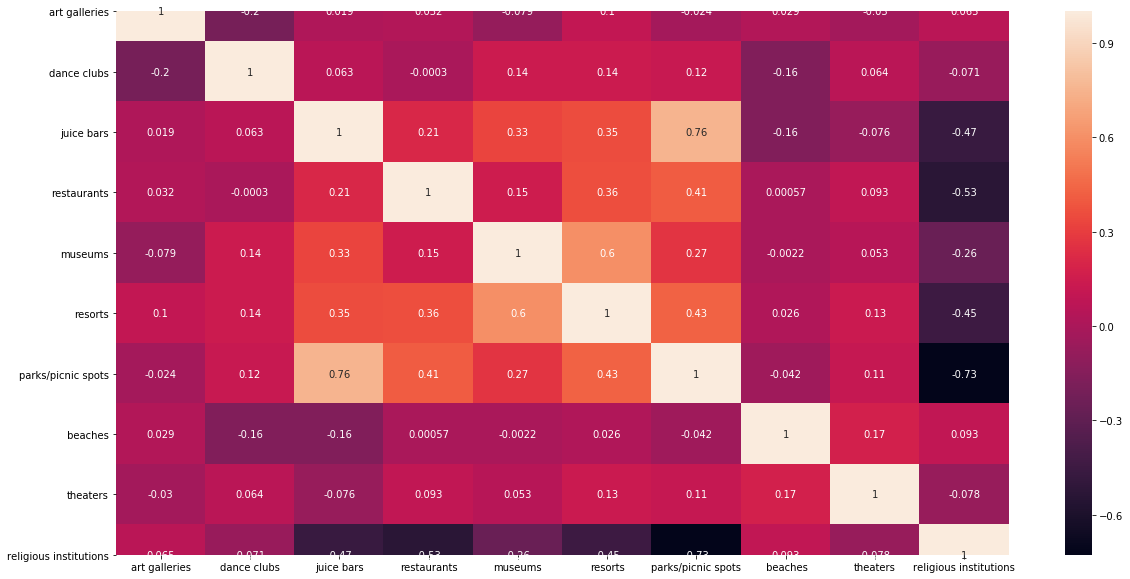

In [21]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled.corr(),annot = True)

### 3. K-Means Clustering

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of K to perform the K-means clustering

In [22]:
from sklearn.cluster import KMeans


In [23]:
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Let us plot the elbow plot and identify the elbow point.

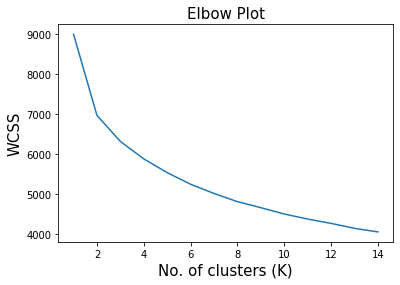

In [24]:

plt.plot(range(1,15), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.2098396013979668)
For 3 clusters the silhouette score is 0.15147852793978028)
For 4 clusters the silhouette score is 0.13059400098750054)
For 5 clusters the silhouette score is 0.1310695809729934)
For 6 clusters the silhouette score is 0.1305246313633315)


### 2.1 Bulid the cluster 

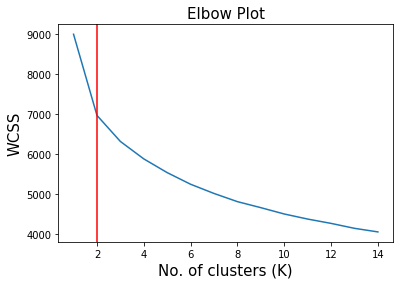

In [26]:
plt.plot(range(1,15), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 2, color = 'red')

# display the plot
plt.show()


In [27]:
new_clusters = KMeans(n_clusters = 2, random_state = 10)

# fit the model
new_clusters.fit(X_scaled)

# append the cluster label for each point in the dataframe 'df_trip'
df_trip_outliers_removed['K-Means_Cluster_ID'] = new_clusters.labels_

In [28]:
df_trip_outliers_removed.head(4)

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID
User ID,,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1


In [29]:
df_trip_outliers_removed['K-Means_Cluster_ID'].value_counts()

0    533
1    367
Name: K-Means_Cluster_ID, dtype: int64

Plot a barplot to visualize the cluster sizes

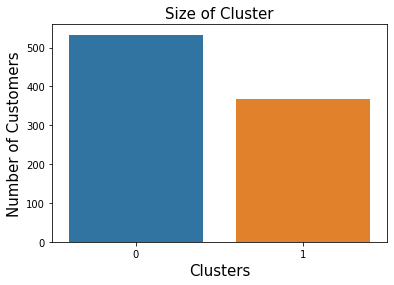

In [30]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_trip_outliers_removed, x = 'K-Means_Cluster_ID')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# display the plot
plt.show()

In [31]:
# size of a cluster 0
len(df_trip_outliers_removed[df_trip_outliers_removed['K-Means_Cluster_ID'] == 0])

533

In [32]:
# size of a cluster 1
len(df_trip_outliers_removed[df_trip_outliers_removed['K-Means_Cluster_ID'] == 1])

367

The cluster 1 is the largest cluster

In [33]:
df_trip_outliers_removed[df_trip_outliers_removed['K-Means_Cluster_ID'] == 1].describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0
mean,0.868692,1.408937,1.626512,0.586022,1.180763,2.229128,3.187003,2.820436,1.591471,2.550300,1.0
std,0.259901,0.458745,0.739557,0.136740,0.370428,0.427722,0.006955,0.120243,0.311880,0.171441,0.0
min,0.350000,0.320000,0.180000,0.290000,0.300000,1.220000,3.180000,2.540000,0.960000,2.260000,1.0
25%,0.700000,1.040000,1.180000,0.505000,0.900000,1.920000,3.180000,2.740000,1.380000,2.420000,1.0
50%,0.830000,1.320000,1.630000,0.560000,1.180000,2.220000,3.190000,2.820000,1.540000,2.500000,1.0
75%,1.005000,1.720000,2.230000,0.630000,1.440000,2.530000,3.190000,2.885000,1.760000,2.660000,1.0
max,1.870000,2.760000,3.120000,1.300000,2.180000,3.380000,3.200000,3.190000,2.620000,3.140000,1.0


In [34]:
df_trip_outliers_removed[df_trip_outliers_removed['K-Means_Cluster_ID'] == 0].describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.0
mean,0.875966,1.252083,0.614934,0.438555,0.743827,1.558161,3.176717,2.843002,1.525028,2.977711,0.0
std,0.295258,0.349695,0.501181,0.106725,0.312942,0.401941,0.005158,0.137188,0.349826,0.278594,0.0
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.480000,0.740000,2.300000,0.0
25%,0.670000,1.080000,0.220000,0.370000,0.540000,1.300000,3.170000,2.740000,1.280000,2.780000,0.0
50%,0.830000,1.240000,0.370000,0.430000,0.740000,1.540000,3.180000,2.830000,1.470000,2.960000,0.0
75%,1.020000,1.440000,0.910000,0.500000,0.960000,1.840000,3.180000,2.940000,1.730000,3.200000,0.0
max,1.870000,2.400000,2.480000,0.810000,1.740000,2.800000,3.180000,3.230000,2.590000,3.660000,0.0


### PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [36]:
pca.fit(X_scaled)

PCA(random_state=42)

In [37]:
pca.components_

array([[-0.01468124,  0.10576915,  0.41118474,  0.32909362,  0.31536331,
         0.40326555,  0.48228555, -0.05683474,  0.07123616, -0.45633387],
       [ 0.40059818, -0.47254619, -0.17710391,  0.23056041, -0.01771249,
         0.16463811, -0.02197576,  0.60042962,  0.37791215, -0.02148509],
       [ 0.44606233, -0.47074934,  0.26569029,  0.09144434, -0.3266343 ,
        -0.19935621,  0.14343325, -0.26315355, -0.50124059, -0.11389542],
       [ 0.40342412, -0.01255643,  0.05447239, -0.31806157,  0.57832102,
         0.41138965, -0.21932709, -0.04130564, -0.30638076,  0.29254842],
       [ 0.54625998,  0.37843921, -0.24506513,  0.25326671, -0.1856953 ,
         0.11560863, -0.12263386, -0.49854526,  0.35028398, -0.00703132],
       [-0.25113453, -0.10830546, -0.45042917,  0.60300221,  0.14055832,
         0.16892649, -0.31585832, -0.06780233, -0.433493  , -0.13465012],
       [ 0.2518672 ,  0.61369968,  0.00838865,  0.09410706, -0.24347797,
        -0.01871963,  0.1023076 ,  0.54932485

In [38]:
pca.explained_variance_ratio_

array([0.31939189, 0.13086157, 0.12379616, 0.10540534, 0.08715564,
       0.08078176, 0.06901419, 0.03824274, 0.0315682 , 0.01378252])

In [39]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.31939189, 0.45025346, 0.57404961, 0.67945495, 0.76661059,
       0.84739235, 0.91640654, 0.95464928, 0.98621748, 1.        ])

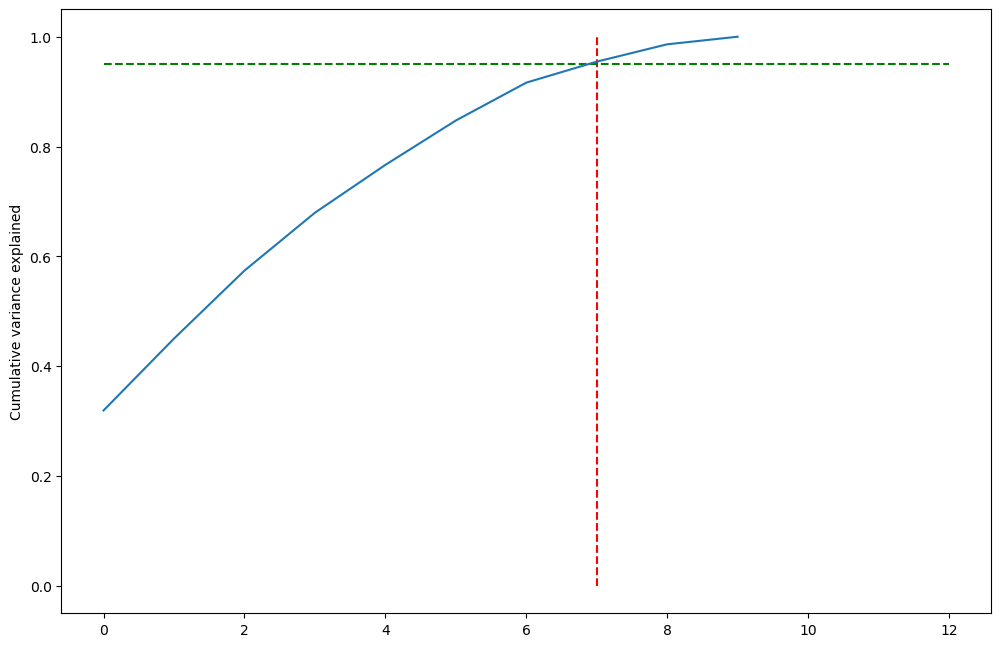

In [40]:
fig = plt.figure(figsize=[12,8],dpi=100)
plt.vlines(x=7, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=12, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## 3 Recommendation

### Popularity Recommendation

In [41]:
df_trip_outliers_removed.head()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID
User ID,,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1
User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,0


In [42]:
df_long = pd.melt(df_trip_outliers_removed, "K-Means_Cluster_ID", var_name="categories")
df_long.head()

,K-Means_Cluster_ID,categories,value
0,1,art galleries,0.93
1,0,art galleries,1.22
2,0,art galleries,0.45
3,1,art galleries,0.51
4,0,art galleries,0.99


User 1 belongs to cluster 0 in art galleries catogries and avg rating is 0.93

In [43]:
df_long.groupby('categories')['value'].mean()

categories
 beaches                  2.833800
art galleries             0.873000
dance clubs               1.316044
juice bars                1.027433
museums                   0.922000
parks/picnic spots        3.180911
religious institutions    2.803422
resorts                   1.831767
restaurants               0.498689
theaters                  1.552122
Name: value, dtype: float64

In [44]:
df_long.groupby('categories')['value'].count()

categories
 beaches                  900
art galleries             900
dance clubs               900
juice bars                900
museums                   900
parks/picnic spots        900
religious institutions    900
resorts                   900
restaurants               900
theaters                  900
Name: value, dtype: int64

In [45]:
rating_mean_count=pd.DataFrame(df_long.groupby('categories')['value'].mean())

In [46]:
rating_mean_count['Rating_count']=pd.DataFrame(df_long.groupby('categories')['value'].count())

In [47]:
rating_mean_count

,value,Rating_count
categories,,
beaches,2.833800,900
art galleries,0.873000,900
dance clubs,1.316044,900
juice bars,1.027433,900
museums,0.922000,900
parks/picnic spots,3.180911,900
religious institutions,2.803422,900
resorts,1.831767,900
restaurants,0.498689,900


In [48]:
rating_mean_count['value'].sort_values(ascending=False)

categories
parks/picnic spots        3.180911
 beaches                  2.833800
religious institutions    2.803422
resorts                   1.831767
theaters                  1.552122
dance clubs               1.316044
juice bars                1.027433
museums                   0.922000
art galleries             0.873000
restaurants               0.498689
Name: value, dtype: float64

Based on the highest avg rating the top 3 categories are parks/picnic sports(3.18), beaches(2.83)  and religious institutions(2.80)

Based on the least avg rating last 3 categories are museums ( 0.922000),art galleries( 0.873000) and restaurants(0.498689).

### Recommendation Based On Cluster

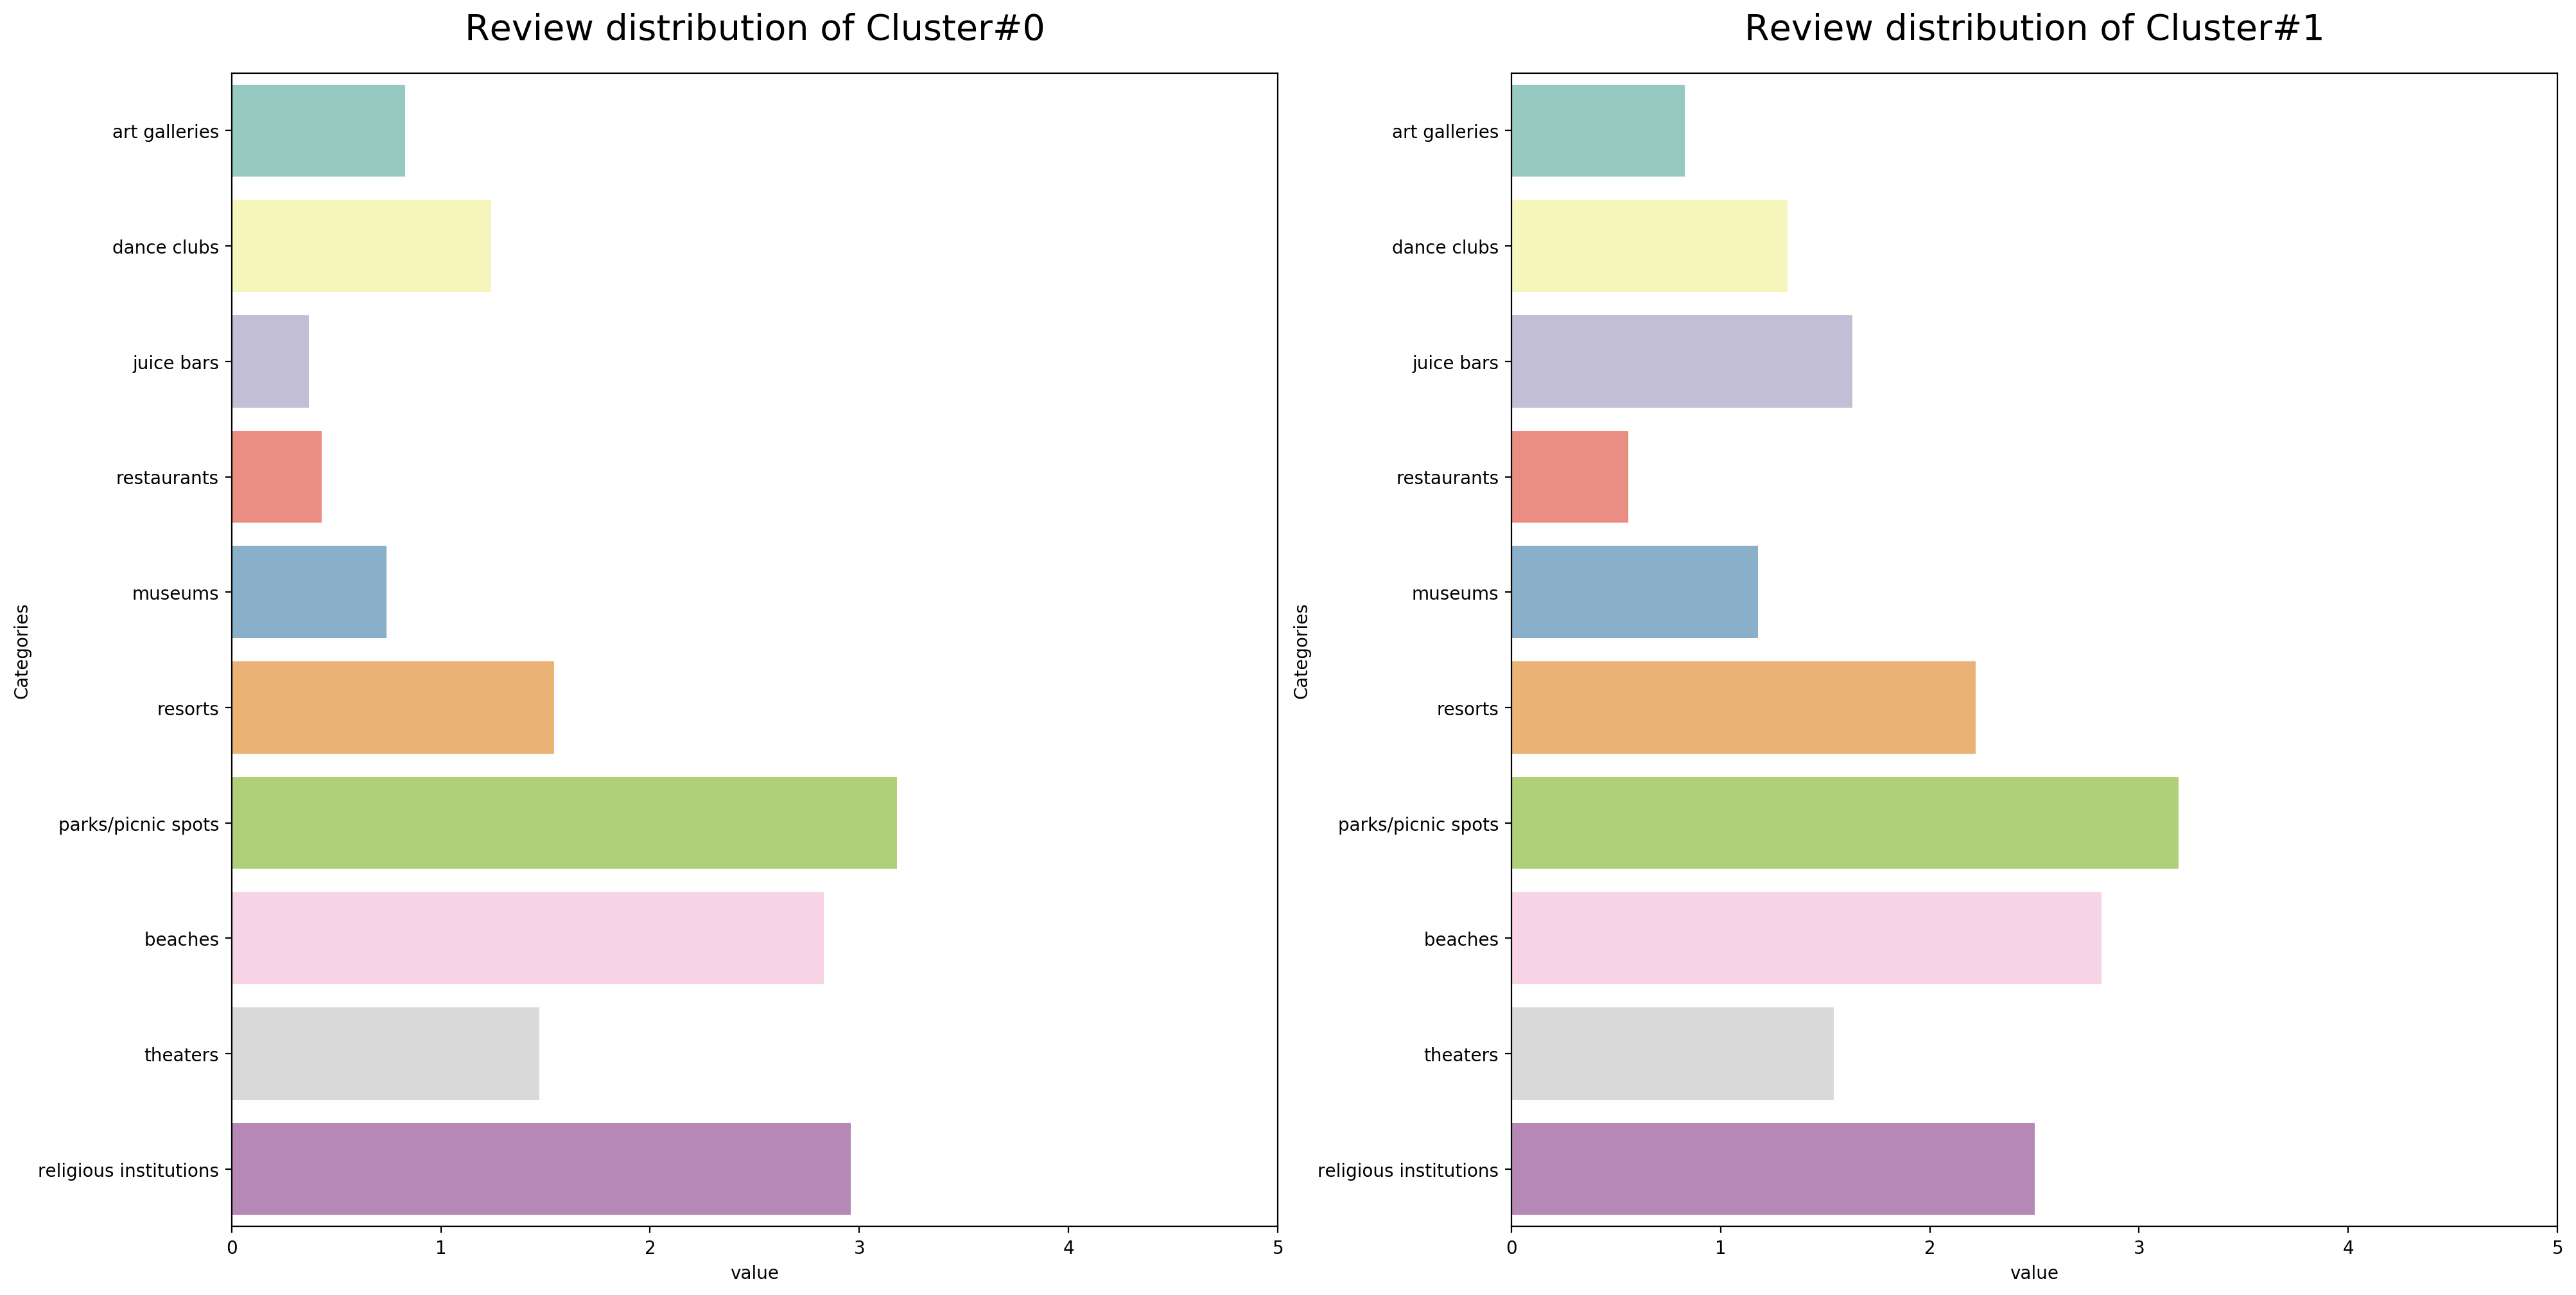

In [49]:
fig = plt.figure(figsize=(20,10),dpi=200)
for i in range(len(df_long['K-Means_Cluster_ID'].unique())):
    plt.subplot(1,len(df_long['K-Means_Cluster_ID'].unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['K-Means_Cluster_ID']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)

plt.savefig('Review rating of each cluster')

In [50]:
Cluster_0=df_long[df_long['K-Means_Cluster_ID']==0]

In [51]:
Cluster_0.groupby('categories')['value'].mean().sort_values(ascending=False)

categories
parks/picnic spots        3.176717
religious institutions    2.977711
 beaches                  2.843002
resorts                   1.558161
theaters                  1.525028
dance clubs               1.252083
art galleries             0.875966
museums                   0.743827
juice bars                0.614934
restaurants               0.438555
Name: value, dtype: float64

In [52]:
Cluster_1=df_long[df_long['K-Means_Cluster_ID']==1]
Cluster_1.groupby('categories')['value'].mean().sort_values(ascending=False)

categories
parks/picnic spots        3.187003
 beaches                  2.820436
religious institutions    2.550300
resorts                   2.229128
juice bars                1.626512
theaters                  1.591471
dance clubs               1.408937
museums                   1.180763
art galleries             0.868692
restaurants               0.586022
Name: value, dtype: float64

We are comparing both the cluster and we can say that the parks/pinic sports, religious institutions and beaches are mostly visited by user.

2).Users of cluster 0 visited museums more than the cluster 1.

3). We  observe the avg rating in both the cluster for every category is different.



### Final Model

In [53]:
pca_model=PCA()
pca_data=pca_model.fit_transform(X_scaled)

X=pca_data
y=df_trip_outliers_removed['K-Means_Cluster_ID']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [57]:
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [58]:
y_pred = model.predict(X_test)
cm_LDA= confusion_matrix(y_test, y_pred)
cm_LDA

array([[95,  2],
       [ 8, 75]], dtype=int64)

In [59]:
ac_LDA = accuracy_score(y_test, y_pred)
print("Accuracy Score:", ac_LDA)

Accuracy Score: 0.9444444444444444


In [60]:
classification_2=classification_report(y_test,y_pred)
print(classification_2)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        97
           1       0.97      0.90      0.94        83

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



In [61]:
from sklearn.ensemble import RandomForestClassifier


ran_model=RandomForestClassifier(random_state=20,n_estimators=200,max_depth=4)
ran_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=20)

In [62]:
y_pred = ran_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_ran= confusion_matrix(y_test, y_pred)
cm_ran

array([[96,  1],
       [ 0, 83]], dtype=int64)

In [63]:
acc_ran = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_ran)

Accuracy Score: 0.9944444444444445


In [64]:
classification_2=classification_report(y_test,y_pred)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      0.99        83

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [65]:
from sklearn.tree import DecisionTreeClassifier


In [66]:
model1 = DecisionTreeClassifier()
model1 = model1.fit(X_train, y_train)

In [67]:
ypred = model1.predict(X_test)

In [68]:
accuracy_score(y_test, ypred)

0.9944444444444445

In [69]:
classification_3=classification_report(y_test,y_pred)
print(classification_3)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      0.99        83

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [70]:
from sklearn.ensemble import BaggingClassifier  

In [71]:
model2 = BaggingClassifier()
model2 = model2.fit(X_train, y_train)

In [72]:
ypred = model2.predict(X_test)

In [73]:
accuracy_score(y_test, ypred)

0.9944444444444445

In [74]:
classification_4=classification_report(y_test,y_pred)
print(classification_4)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      0.99        83

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [75]:
# import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [76]:

# covariance matrix
cov_matrix = np.cov(pca_data.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 3.19747164e+00  1.14603667e-16 -5.31523904e-16  3.97160984e-16
   6.24392393e-16  8.44708063e-17  2.09448081e-16  2.07472156e-16
   1.08428901e-16 -3.95185059e-18]
 [ 1.14603667e-16  1.31007131e+00 -1.49577545e-15 -9.87962647e-18
   1.17567555e-16  9.53383954e-17 -3.02316570e-16  6.86634040e-17
   7.31092359e-17  3.45786926e-17]
 [-5.31523904e-16 -1.49577545e-15  1.23933862e+00  1.02748115e-16
  -7.33068284e-16  5.53259082e-17  1.59061986e-16 -3.95185059e-18
   2.17351782e-17 -1.46959444e-17]
 [ 3.97160984e-16 -9.87962647e-18  1.02748115e-16  1.05522583e+00
   6.81694226e-16 -1.38314771e-16  6.52055347e-17  5.33499829e-17
   6.91573853e-18 -2.81569354e-17]
 [ 6.24392393e-16  1.17567555e-16 -7.33068284e-16  6.81694226e-16
   8.72525873e-01  2.32171222e-17  3.71473955e-16  1.08675891e-16
  -5.75488242e-17 -4.81631790e-17]
 [ 8.44708063e-17  9.53383954e-17  5.53259082e-17 -1.38314771e-16
   2.32171222e-17  8.08716187e-01  3.95185059e-17  8.99046009e-17
   8.891663

In [77]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [78]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.00000000e+00  1.29166840e-18 -3.76301285e-17  7.37123459e-17
   6.07203809e-17  2.71444227e-16 -1.85394684e-16  8.35599008e-17
  -2.68562132e-16  3.53618476e-17]
 [-5.80502551e-17  2.42920097e-17 -5.27813323e-16 -4.07663287e-16
  -1.00000000e+00  3.11682094e-14  1.00622526e-16 -8.74013949e-17
  -2.93698316e-16 -1.33972859e-16]
 [ 2.62641359e-16  1.43695852e-16 -5.46112064e-16  6.08681889e-16
   2.98026668e-14  1.00000000e+00 -8.76483702e-16  5.32973698e-16
   1.79837956e-15  1.59184551e-17]
 [-1.83428207e-16  2.28941134e-16 -8.20227903e-17  1.14665890e-16
  -2.59435158e-16 -1.53824211e-16  1.00000000e+00  1.28539510e-16
  -2.76155550e-15 -1.03689071e-15]
 [-2.68373687e-16 -9.78315016e-17 -1.78931603e-16 -6.11257606e-17
  -6.33154867e-16 -2.81628571e-15  4.61997094e-15  3.32632500e-15
   1.00000000e+00  1.36810097e-15]
 [-3.53618458e-17 -7.26163342e-17  1.43966050e-16  4.63659925e-16
   1.03913092e-16 -5.51786227e-17 -7.92955954e-16 -5.92368006e-16
   2.37945724e-

In [79]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 31.93918893  45.02534566  57.40496141  67.945495    76.661059
  84.73923513  91.64065366  95.46492795  98.62174798 100.        ]


In [80]:
len(cum_var_exp[cum_var_exp > 95])

3

In [81]:
pca1 = PCA(n_components=3).fit_transform(X_scaled)

In [82]:
model_pca = DecisionTreeClassifier()
model_pca = model_pca.fit(pca1, y)

In [83]:
y_pred = model_pca.predict(pca1)

In [84]:
accuracy_score(y, y_pred)

1.0

While comparing all the  model there is  overfitting because accuracy is 1 but if  we consider LDA the accuracy is 0.94 we can say it is a good model.